In [29]:
from pycaret.classification import *


In [2]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("C:/Users/97254/Downloads/patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [26]:
dataset.head()

,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


# preproccesing

In [4]:
dataset.isnull().sum()

ser_num                0
ICU_LOS                0
LOS_Group              0
ICU_mortality          0
HOSP_mortality         0
28_mortality           0
90 days mortality      0
trauma                 0
metabolic              0
gastrointestinal       0
Sepsis                 0
age                    0
gender                 0
weight                 0
BMI                    0
APACHEII               0
active problems        0
background problems    0
feeding                0
Target_pro_day         0
pro_to_target_day0     0
pro_to_target_day1     0
pro_to_target_day2     0
pro_to_target_day3     0
pro_to_target_day4     0
pro_to_target_day5     0
pro_to_target_day6     0
pro_to_target_day7     0
pro_to_target_day8     0
pro_to_target_day9     0
pro_to_target_day10    0
pro_to_target_day11    0
pro_to_target_day12    0
pro_to_target_day13    0
Total_EN_pro           0
Total_PN_pro           0
EN_pro_day0            0
PN_pro_day0            0
EN_pro_day1            0
PN_pro_day1            0


In [5]:
dataset[dataset['age']=='NAN'].shape

(44, 70)

In [3]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [4]:
dataset.shape

(976, 70)

# try model we learned in class

In [69]:
y = dataset[['ICU_mortality']]

X = dataset[[
    'LOS_Group',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
print(dataset.shape)


(976, 70)


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['active problems'] = le.fit_transform(X['active problems'].astype(str))
X['background problems'] = le.fit_transform(X['background problems'].astype(str))
X['gender'] = le.fit_transform(X['gender'].astype(str))
X['feeding'] = le.fit_transform(X['feeding'].astype(str))
X['LOS_Group'] = le.fit_transform(X['LOS_Group'].astype(str))

In [65]:
X.head()

,LOS_Group,trauma,metabolic,gastrointestinal,Sepsis,age,gender,weight,BMI,active problems,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,0,0,1,0,1,72,0,65.0,23.875115,1,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,0,0,1,0,1,58,1,101.0,32.979592,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,1,0,0,1,1,44,1,70.0,22.857143,3,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,0,0,1,1,0,71,0,48.0,19.227688,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,0,1,1,1,0,60,0,85.0,32.791945,0,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [57]:
y.value_counts()

ICU_mortality
0                741
1                235
dtype: int64

In [72]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection
# define seed for reproducibility
seed = 1
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)



# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using
# from sklearn.  We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define scoring method
scoring = 'recall'

# Define models to train
names = ["Nearest Neighbors",
         "Decision Tree", "Random Forest",  "AdaBoost",
          "SVM Linear"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=5,),
    AdaBoostClassifier(),
    SVC(kernel = 'linear'), 

]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Nearest Neighbors: 0.170312 (0.057516)
Decision Tree: 0.153164 (0.081436)
Random Forest: 0.096357 (0.092305)
AdaBoost: 0.168519 (0.097215)


KeyboardInterrupt: 

# best model by pycaret-no normalization

In [5]:
x = dataset[[
'LOS_Group',
'ICU_mortality',
'trauma',
'metabolic',
'gastrointestinal',
'Sepsis'
,'age'
,'gender'
,'weight'
,'BMI'
,'active problems'
,'background problems'
,'feeding'
,'Target_pro_day'
,'pro_to_target_day0'
,'pro_to_target_day1'
,'pro_to_target_day2'
,'pro_to_target_day3'
,'pro_to_target_day4'
,'pro_to_target_day5'
,'pro_to_target_day6'
,'pro_to_target_day7'
,'pro_to_target_day8'
,'pro_to_target_day9'
,'pro_to_target_day10'
,'pro_to_target_day11'
,'pro_to_target_day12'
,'pro_to_target_day13'
,'Total_EN_pro'
,'Total_PN_pro'
,'EN_pro_day0'
,'PN_pro_day0'
,'EN_pro_day1'
,'PN_pro_day1'
,'EN_pro_day2'
,'PN_pro_day2'
,'EN_pro_day3'
,'PN_pro_day3'
,'EN_pro_day4'
,'PN_pro_day4'
,'EN_pro_day5'
,'PN_pro_day5'
,'EN_pro_day6'
,'PN_pro_day6'
,'EN_pro_day7'
,'PN_pro_day7'
,'EN_pro_day8'
,'PN_pro_day8'
,'EN_pro_day9'
,'PN_pro_day9'
,'EN_pro_day10'
,'PN_pro_day10'
,'EN_pro_day11'
,'PN_pro_day11'
,'EN_pro_day12'
,'PN_pro_day12'
,'EN_pro_day13'
,'PN_pro_day13'  
,'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]
x.shape

(976, 64)

In [161]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=x, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,2314
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 19)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [162]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7536,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.2500,0.5000,1.0000,0.2500,0.4000,0.0000,0.0000
4,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000
5,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000
6,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000
7,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000
8,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000
9,0.2353,0.5000,1.0000,0.2353,0.3810,0.0000,0.0000


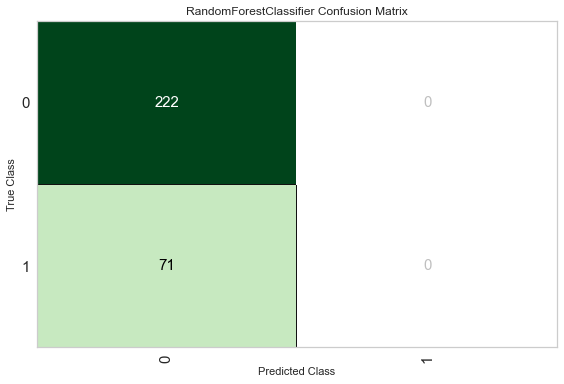

In [163]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# with normalization

In [52]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=x, target='ICU_mortality', data_split_stratify = True,normalize = True)

,Description,Value
0,session_id,6546
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(976, 65)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


In [53]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9275,0.9519,1.0000,0.7727,0.8718,0.8224,0.8357
1,0.8696,0.9135,1.0000,0.6538,0.7907,0.7019,0.7353
2,0.8841,0.9231,1.0000,0.6800,0.8095,0.7305,0.7585
3,0.8088,0.8750,1.0000,0.5517,0.7111,0.5854,0.6433
4,0.8088,0.8534,0.9375,0.5556,0.6977,0.5709,0.6127
5,0.9118,0.9423,1.0000,0.7273,0.8421,0.7830,0.8021
6,0.8824,0.9231,1.0000,0.6667,0.8000,0.7213,0.7511
7,0.9265,0.9519,1.0000,0.7619,0.8649,0.8156,0.8298
8,0.9118,0.9423,1.0000,0.7273,0.8421,0.7830,0.8021
9,0.9118,0.9412,1.0000,0.7391,0.8500,0.7895,0.8076


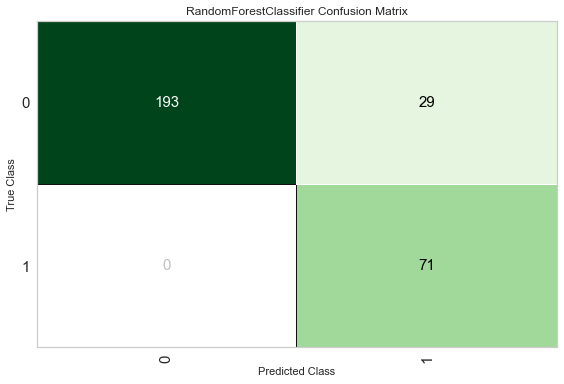

In [54]:
plot_model(tuned_rf, plot = 'confusion_matrix')


# K mean

In [43]:
X = dataset[[

'EN_pro_day0/kg'   
,'EN_pro_day1/kg'    
,'EN_pro_day2/kg'      
,'EN_pro_day3/kg'    
,'EN_pro_day4/kg'       
,'EN_pro_day5/kg'        
    
]]


In [127]:
X = X[X['EN_pro_day1/kg']>0]


In [128]:
from pycaret.clustering import *
exp_clu101 = setup(X, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(745, 6)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(745, 6)"
9,CPU Jobs,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2481,312.0211,1.281,0,0,0


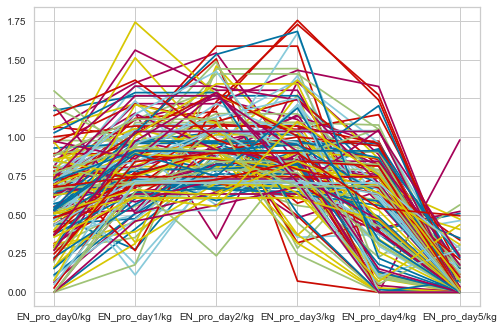

In [129]:
kmeans = create_model('kmeans')
kmean_results = assign_model(kmeans)
class1=kmean_results[kmean_results.Cluster=='Cluster 1']
class1_nocl=class1.iloc[:,:6]
for index, row in class1_nocl.iterrows():
    row.plot.line()

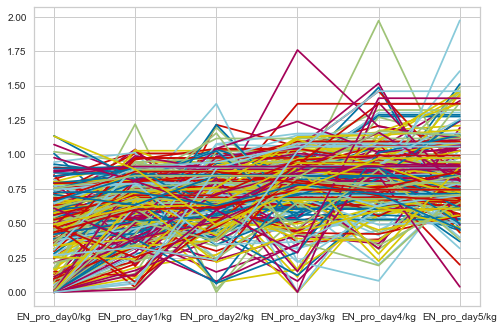

In [130]:
class2=kmean_results[kmean_results.Cluster=='Cluster 2']
class1_noc2=class2.iloc[:,:6]
for index, row in class1_noc2.iterrows():
    row.plot.line()

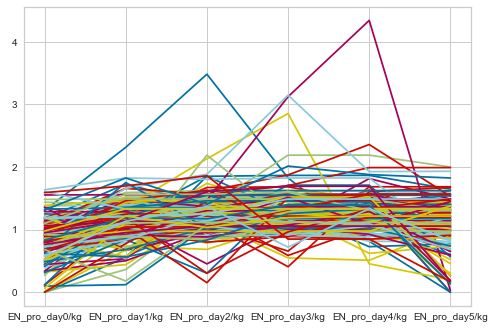

In [131]:
class3=kmean_results[kmean_results.Cluster=='Cluster 3']
class1_noc3=class3.iloc[:,:6]
for index, row in class1_noc3.iterrows():
    row.plot.line()

# run rf on every cluster:

In [140]:
#select indexes from this cluster
np.array(class1.index)

array([   5,    8,   13,   14,   16,   24,   34,   41,   50,   51,   61,
         63,   68,   70,   80,   86,   98,  101,  116,  119,  136,  143,
        151,  152,  153,  154,  157,  163,  166,  190,  194,  202,  206,
        214,  215,  218,  220,  228,  229,  239,  245,  249,  253,  269,
        279,  288,  293,  297,  313,  325,  336,  347,  348,  349,  370,
        371,  384,  389,  401,  405,  414,  422,  424,  435,  444,  465,
        470,  478,  479,  481,  496,  497,  503,  514,  535,  537,  541,
        550,  552,  568,  573,  602,  604,  609,  610,  611,  614,  615,
        627,  640,  651,  658,  675,  681,  686,  687,  699,  702,  703,
        716,  728,  731,  737,  738,  753,  763,  766,  771,  772,  773,
        788,  789,  800,  808,  841,  849,  854,  862,  864,  867,  876,
        877,  881,  883,  891,  900,  901,  903,  915,  922,  935,  937,
        941,  944,  947,  973,  978,  980,  984,  986,  997, 1006, 1013],
      dtype=int64)

In [169]:
c=dataset.iloc[[          5,    8,   13,   14,   16,   24,   34,   41,   50,   51,   61,
         63,   68,   70,   80,   86,   98,  101,  116,  119,  136,  143,
        151,  152,  153,  154,  157,  163,  166,  190,  194,  202,  206,
        214,  215,  218,  220,  228,  229,  239,  245,  249,  253,  269,
        279,  288,  293,  297,  313,  325,  336,  347,  348,  349,  370,
        371,  384,  389,  401,  405,  414,  422,  424,  435,  444,  465,
        470,  478,  479,  481,  496,  497,  503,  514,  535,  537,  541,
        550,  552,  568,  573,  602,  604,  609,  610,  611,  614,  615,
        627,  640,  651,  658,  675,  681,  686,  687,  699,  702,  703,
        716,  728,  731,  737,  738,  753,  763,  766,  771,  772,  773,
        788,  789,  800,  808,  841,  849,  854,  862,  864,  867,  876,
        877,  881,  883,  891,  900,  901,  903,  915,  922,  935,  937,
        941,  944,  947,

]]

In [170]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=c, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,7869
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(135, 70)"
5,Missing Values,False
6,Numeric Features,54
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [171]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7000,0.8750,1.0000,0.4000,0.5714,0.4000,0.5000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,1.0000,0.7500,0.8571,0.7826,0.8018
3,0.9000,0.9524,1.0000,0.7500,0.8571,0.7826,0.8018
4,0.6667,0.8214,0.5000,0.3333,0.4000,0.1818,0.1890
5,0.7778,0.8571,1.0000,0.5000,0.6667,0.5263,0.5976
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8889,0.8929,1.0000,0.6667,0.8000,0.7273,0.7559


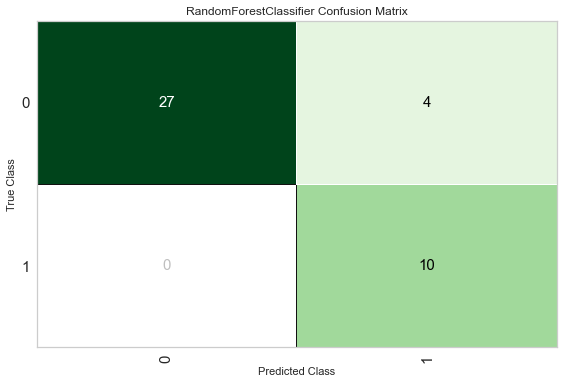

In [172]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [142]:
np.array(class2.index)

array([   4,   17,   19,   20,   21,   22,   25,   27,   28,   29,   30,
         35,   36,   38,   39,   40,   45,   47,   48,   49,   53,   55,
         56,   57,   60,   69,   77,   78,   84,   87,   89,   91,   92,
         95,  103,  104,  112,  127,  128,  131,  138,  160,  165,  171,
        179,  184,  189,  193,  200,  210,  211,  217,  227,  236,  237,
        243,  252,  255,  256,  258,  263,  264,  267,  268,  270,  272,
        274,  275,  284,  286,  294,  300,  310,  319,  320,  324,  327,
        331,  332,  334,  338,  339,  340,  344,  346,  351,  352,  356,
        357,  359,  364,  365,  366,  368,  373,  374,  387,  396,  415,
        416,  418,  427,  443,  446,  450,  454,  455,  456,  457,  461,
        467,  468,  469,  473,  475,  476,  480,  482,  491,  493,  495,
        507,  508,  509,  515,  517,  518,  519,  521,  525,  526,  530,
        538,  543,  548,  549,  551,  556,  557,  566,  575,  576,  577,
        578,  579,  587,  590,  595,  606,  607,  6

In [152]:
b=dataset.iloc[[      4,   17,   19,   20,   21,   22,   25,   27,   28,   29,   30,
         35,   36,   38,   39,   40,   45,   47,   48,   49,   53,   55,
         56,   57,   60,   69,   77,   78,   84,   87,   89,   91,   92,
         95,  103,  104,  112,  127,  128,  131,  138,  160,  165,  171,
        179,  184,  189,  193,  200,  210,  211,  217,  227,  236,  237,
        243,  252,  255,  256,  258,  263,  264,  267,  268,  270,  272,
        274,  275,  284,  286,  294,  300,  310,  319,  320,  324,  327,
        331,  332,  334,  338,  339,  340,  344,  346,  351,  352,  356,
        357,  359,  364,  365,  366,  368,  373,  374,  387,  396,  415,
        416,  418,  427,  443,  446,  450,  454,  455,  456,  457,  461,
        467,  468,  469,  473,  475,  476,  480,  482,  491,  493,  495,
        507,  508,  509,  515,  517,  518,  519,  521,  525,  526,  530,
        538,  543,  548,  549,  551,  556,  557,  566,  575,  576,  577,
        578,  579,  587,  590,  595,  606,  607,  613,  616,  618,  619,
        631,  635,  637,  638,  645,  646,  648,  652,  655,  656,  662,
        663,  674,  680,  693,  700,  701,  704,  719,  723,  732,  733,
        734,  740,  742,  748,  754,  759,  761,  764,  768,  769,  774,
        783,  790,  792,  793,  794,  796,  814,  819,  821,  830,  833,
        834,  842,  847,  852,  857,  860,  861,  879,  884,  888,  889,
        890,  893,  894,  895,  897,  898,  899,  904,  909,  913,  917,
        919,  920,  923,  928,  930,  932,  939,  940,  942,  945,  953,
        957,  958,  961,  962,

]]

In [144]:
np.array(class3.index)

array([   0,    3,    6,   10,   32,   52,   58,   65,   72,   73,   74,
         82,   88,   96,  110,  118,  121,  132,  134,  140,  144,  149,
        161,  172,  173,  176,  181,  182,  188,  191,  197,  205,  207,
        208,  221,  222,  223,  231,  233,  235,  238,  259,  260,  262,
        276,  278,  298,  314,  329,  335,  343,  362,  363,  372,  390,
        392,  399,  400,  402,  404,  406,  409,  410,  419,  426,  428,
        430,  434,  436,  438,  440,  452,  458,  463,  471,  474,  483,
        490,  494,  511,  513,  516,  527,  531,  536,  544,  546,  547,
        555,  558,  574,  584,  592,  594,  598,  617,  654,  659,  660,
        665,  672,  677,  682,  683,  684,  685,  688,  692,  707,  708,
        709,  711,  717,  718,  720,  722,  724,  725,  746,  749,  756,
        767,  770,  775,  795,  804,  805,  813,  817,  822,  825,  835,
        837,  838,  839,  846,  853,  855,  863,  868,  870,  880,  902,
        905,  914,  916,  927,  936,  949,  959,  9

In [148]:
a=dataset.iloc[[     0,    3,    6,   10,   32,   52,   58,   65,   72,   73,   74,
         82,   88,   96,  110,  118,  121,  132,  134,  140,  144,  149,
        161,  172,  173,  176,  181,  182,  188,  191,  197,  205,  207,
        208,  221,  222,  223,  231,  233,  235,  238,  259,  260,  262,
        276,  278,  298,  314,  329,  335,  343,  362,  363,  372,  390,
        392,  399,  400,  402,  404,  406,  409,  410,  419,  426,  428,
        430,  434,  436,  438,  440,  452,  458,  463,  471,  474,  483,
        490,  494,  511,  513,  516,  527,  531,  536,  544,  546,  547,
        555,  558,  574,  584,  592,  594,  598,  617,  654,  659,  660,
        665,  672,  677,  682,  683,  684,  685,  688,  692,  707,  708,
        709,  711,  717,  718,  720,  722,  724,  725,  746,  749,  756,
        767,  770,  775,  795,  804,  805,  813,  817,  822,  825,  835,
        837,  838,  839,  846,  853,  855,  863,  868,  870,  880,  902,
        905,  914,  916,  927,  936,  949,  959,

]]

In [166]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=a, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,8648
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(150, 70)"
5,Missing Values,False
6,Numeric Features,52
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [167]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.8750,1.0000,0.6000,0.7500,0.6207,0.6708
1,0.8182,0.8750,1.0000,0.6000,0.7500,0.6207,0.6708
2,0.9091,0.9375,1.0000,0.7500,0.8571,0.7925,0.8101
3,0.9091,0.9286,1.0000,0.8000,0.8889,0.8136,0.8281
4,0.9000,0.9286,1.0000,0.7500,0.8571,0.7826,0.8018
5,0.9000,0.9286,1.0000,0.7500,0.8571,0.7826,0.8018
6,0.6000,0.7143,1.0000,0.4286,0.6000,0.3103,0.4286
7,0.8000,0.8571,1.0000,0.6000,0.7500,0.6000,0.6547
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


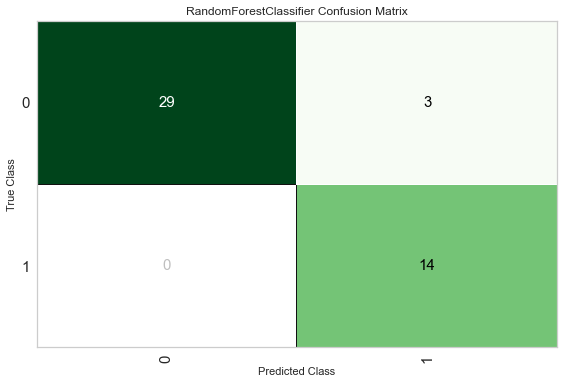

In [168]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [158]:
from pycaret.classification import *

#dataset = dataset.sample(frac=0.38, random_state=120)
#data_unseen = dataset.drop(data.index)


model_setup = setup(data=b, target='ICU_mortality', data_split_stratify = True)

,Description,Value
0,session_id,2124
1,Target,ICU_mortality
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(235, 70)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [159]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9615,1.0000,0.8000,0.8889,0.8496,0.8593
1,0.9412,0.9615,1.0000,0.8000,0.8889,0.8496,0.8593
2,0.9412,0.9615,1.0000,0.8000,0.8889,0.8496,0.8593
3,0.9412,0.9615,1.0000,0.8000,0.8889,0.8496,0.8593
4,0.9375,0.9583,1.0000,0.8000,0.8889,0.8462,0.8563
5,0.9375,0.9583,1.0000,0.8000,0.8889,0.8462,0.8563
6,0.8750,0.9231,1.0000,0.6000,0.7500,0.6735,0.7125
7,0.8750,0.9231,1.0000,0.6000,0.7500,0.6735,0.7125
8,0.8125,0.8846,1.0000,0.5000,0.6667,0.5556,0.6202
9,0.8125,0.8846,1.0000,0.5000,0.6667,0.5556,0.6202


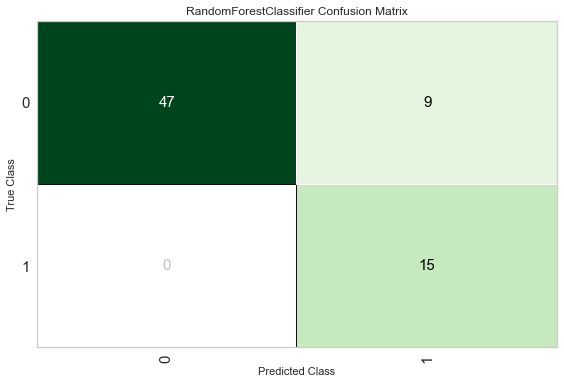

In [160]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [ ]:
#for more info: https://pycaret.org/tune-model/
#model = create_model("nb")
#tuned_rf = tune_model(model, optimize = 'recall')